# Linear regression

In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [4]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds()

In [6]:
y = x + np.random.standard_normal(len(x))
fit_result = np.polyfit(x, y, deg=1)
fit_result

array([ 1.03504253, -0.34274365])

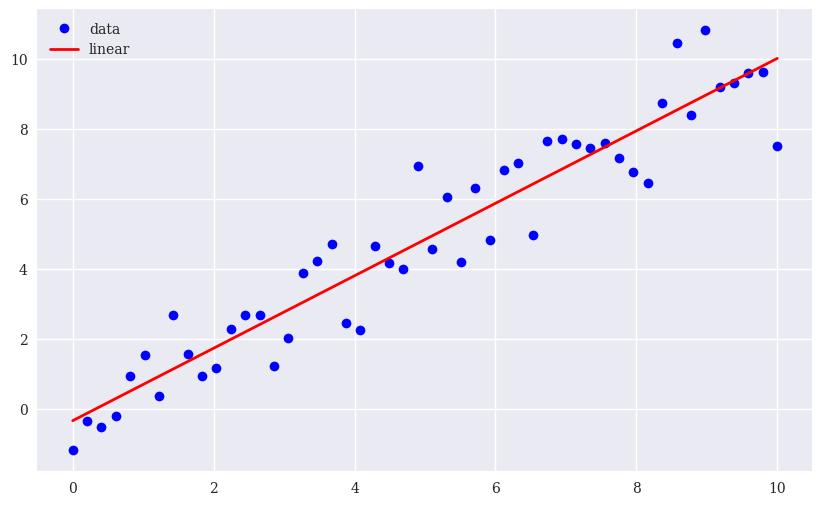

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(fit_result, x), 'r', lw=2, label='linear')
plt.legend(loc=0);

### Extrapolate

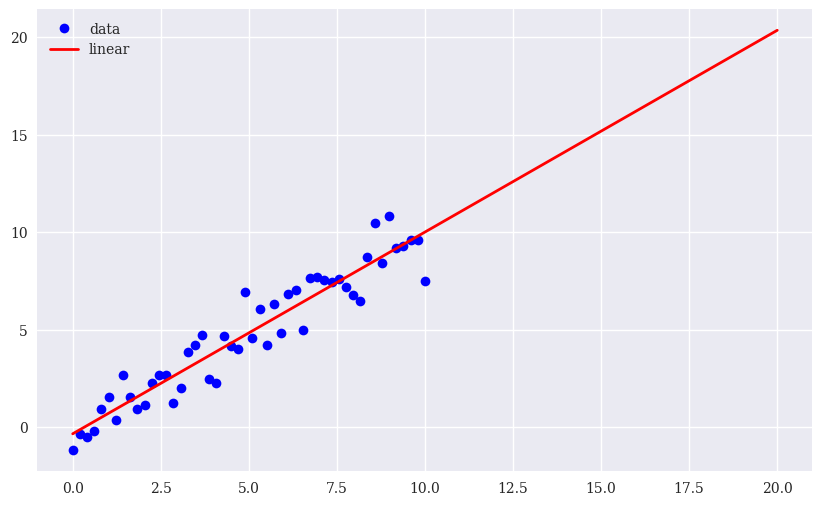

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(fit_result, xn), 'r', lw=2, label='linear')
plt.legend(loc=0);

### Basics for time series

In [57]:
# split the time series so that each part has 3 inputs and 1 output
x = np.arange(12)
lags = 3
m = np.zeros((lags + 1, len(x) - lags))
for i in range(lags + 1):
    m[i] = x[i:len(x) - lags + i]
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [20]:
result = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
result

array([-0.66666667,  0.33333333,  1.33333333])

In [59]:
np.dot(m[:lags].T, result)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Practice example

In [61]:
import pandas as pd
raw = pd.read_csv('../data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [65]:
symbol = 'EUR='
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol:'price'}, inplace=True)

In [70]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}' # the same as: col = 'lag_%s' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-26,1.4073,1.4150,1.4137,1.4090,1.4101,1.4298
2010-01-27,1.4017,1.4073,1.4150,1.4137,1.4090,1.4101
2010-01-28,1.3962,1.4017,1.4073,1.4150,1.4137,1.4090
2010-01-29,1.3862,1.3962,1.4017,1.4073,1.4150,1.4137
2010-02-01,1.3927,1.3862,1.3962,1.4017,1.4073,1.4150


In [71]:
# use the lag 5 to predict the spot 
fit_result = np.linalg.lstsq(data[cols], data['price'],
                             rcond=None)[0]
fit_result

array([ 0.98340339,  0.02550329, -0.04779068,  0.05302362, -0.01425603])

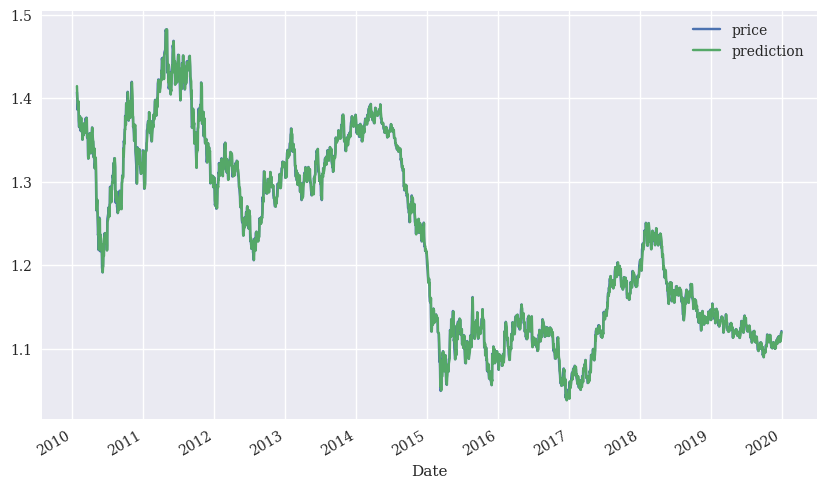

In [74]:
data['prediction'] = np.dot(data[cols], fit_result)
data[['price', 'prediction']].plot(figsize=(10, 6));

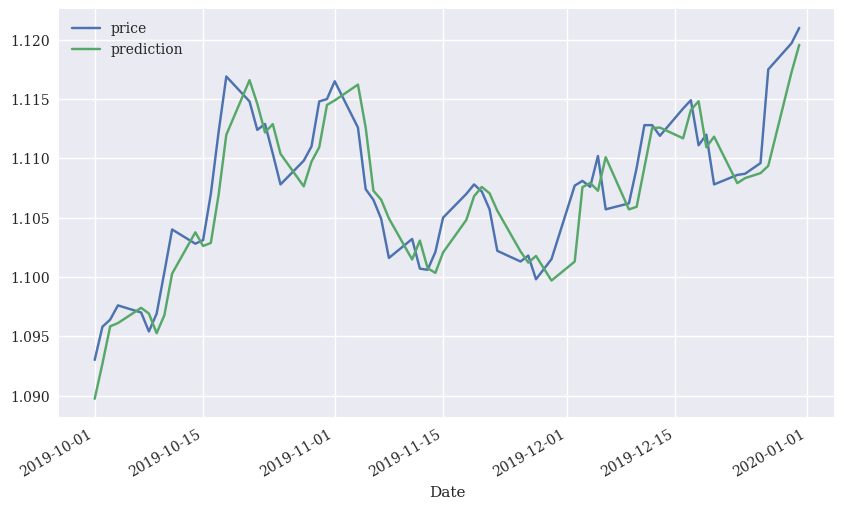

In [75]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6));